In [7]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Anteseden (Input)

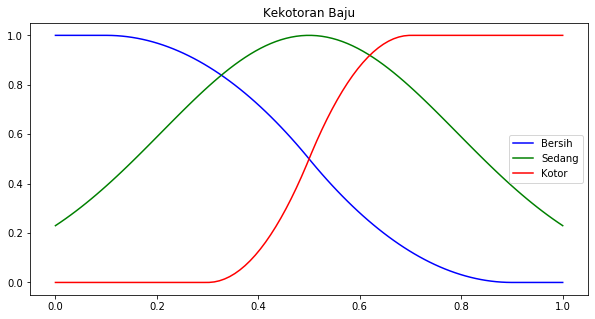

In [13]:
## Baju Kotor 
x_kotor=np.linspace(start = 0, stop = 1, num = 100, dtype = float)
y_kotor=fuzz.membership.gaussmf(x_kotor,np.mean(x_kotor),np.std(x_kotor)) 
y1_kotor=fuzz.membership.zmf(x_kotor,0.1,0.9)
y2_kotor=fuzz.membership.smf(x_kotor,0.3,0.7)
y3_kotor=fuzz.membership.trimf(x_kotor,0.3)
## plotting
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x_kotor, y1_kotor, 'b', linewidth=1.5, label='Bersih')
ax.plot(x_kotor, y_kotor, 'g', linewidth=1.5, label='Sedang')
ax.plot(x_kotor, y2_kotor, 'r', linewidth=1.5, label='Kotor')
ax.plot(x_kotor, y2_kotor, 'r', linewidth=1.5, label='Kotor')
ax.set_title('Kekotoran Baju')
ax.legend()
plt.show()

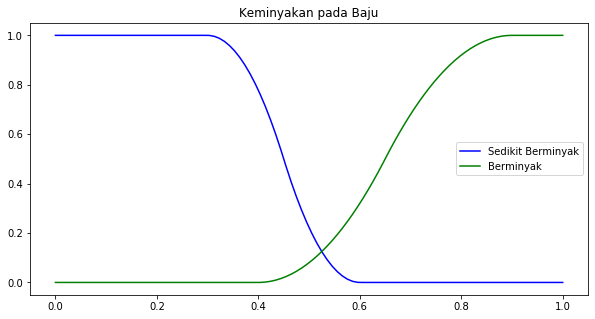

In [9]:
## Baju Berminyak
x_minyak=np.linspace(start = 0, stop = 1, num = 100, dtype = float)
y_minyak=fuzz.membership.zmf(x_minyak,0.3,0.6)
y1_minyak=fuzz.membership.smf(x_minyak,0.4,0.9)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x_minyak, y_minyak, 'b', linewidth=1.5, label='Sedikit Berminyak')
ax.plot(x_minyak, y1_minyak, 'g', linewidth=1.5, label='Berminyak')
ax.set_title('Keminyakan pada Baju')
ax.legend()
plt.show()


##  Konsekuen (Output)

In [ ]:
## Lama mencuci
x_waktu=np.linspace(start = 1, stop = 60, num = 100, dtype = float)
y_waktu=fuzz.membership.trimf(x_waktu,[1,1,10])
y1_waktu=fuzz.membership.trimf(x_waktu,[5,30,40])
y2_waktu=fuzz.membership.trimf(x_waktu,[30,60,60])
## plotting
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x_waktu, y_waktu, 'b', linewidth=1.5, label='Sebentar')
ax.plot(x_waktu, y1_waktu, 'g', linewidth=1.5, label='Sedang')
ax.plot(x_waktu, y2_waktu, 'r', linewidth=1.5, label='Lama')
ax.set_title('Lama Mencuci')
ax.legend()
plt.show()

## Rule
Jika kekotoran baju adalah bersih dan keminyakan baju adalah sedikit berminyak, maka lama mencuci adalah sebentar. <br>
Jika kekotoran baju adalah sedang atau keminyakan baju adalah berminyak, maka lama mencuci adalah sedang.<br>
Jika kekotoran baju adalah kotor atau keminyakan baju adalah berminyak, maka lama mencuci adalah lama.<br>


## Input

In [276]:
input_baju_kekotoran=float(input('seberapa kotor baju anda ? / '))
input_baju_keminyakan=float(input('seberapa berminyak baju anda ? / '))

seberapa kotor baju anda ? / 0.2
seberapa berminyak baju anda ? / 0.45


In [277]:
# Kekotoran baju
kotor_level_lo = fuzz.interp_membership(x_kotor, y1_kotor, input_baju_kekotoran)
kotor_level_md = fuzz.interp_membership(x_kotor, y_kotor, input_baju_kekotoran)
kotor_level_hi = fuzz.interp_membership(x_kotor, y2_kotor, input_baju_kekotoran)
# Keminyakan baju
minyak_level_lo = fuzz.interp_membership(x_minyak, y_minyak, input_baju_keminyakan)
minyak_level_hi = fuzz.interp_membership(x_minyak, y1_minyak, input_baju_keminyakan)

# Jika kekotoran baju adalah bersih dan keminyakan baju adalah sedikit berminyak, maka lama mencuci adalah sebentar.
active_rule1 = np.fmin(kotor_level_lo, minyak_level_lo)
# Jika kekotoran baju adalah sedang atau keminyakan baju adalah berminyak, maka lama mencuci adalah sedang.
active_rule2 = np.fmax(kotor_level_md, minyak_level_hi)
# Jika kekotoran baju adalah kotor atau keminyakan baju adalah berminyak, maka lama mencuci adalah lama.
active_rule3 = np.fmax(kotor_level_hi,minyak_level_hi)
#vektor 0
waktu0 = np.zeros_like(x_waktu)

In [278]:
print('kekotoran baju adalah sedang',kotor_level_md)
print('keminyakan baju adalah berminyak',minyak_level_hi)
print('hasil rule2 ',active_rule2)

kekotoran baju adalah sedang 0.5890171457732573
keminyakan baju adalah berminyak 0.020202020202020193
hasil rule2  0.5890171457732573


### Rule 1

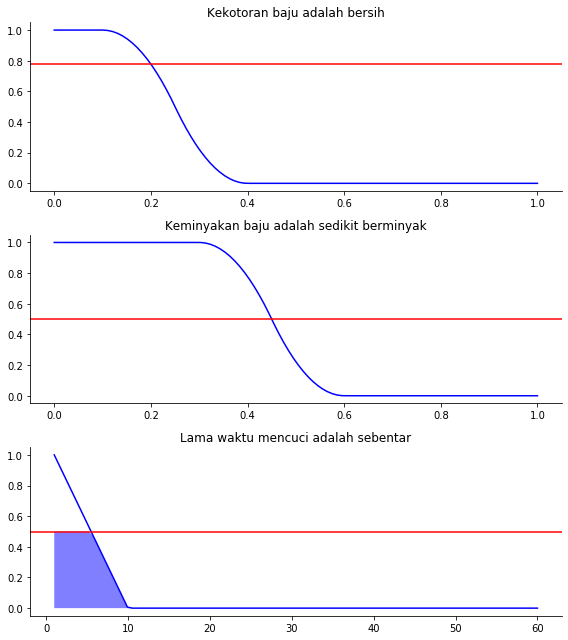

In [273]:
# Jika kekotoran baju adalah bersih dan keminyakan baju adalah sedikit berminyak, maka lama mencuci adalah sebentar.
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))
#1
x_kotor=np.linspace(start = 0, stop = 1, num = 100, dtype = float)
y1_kotor=fuzz.membership.zmf(x_kotor,0.1,0.4)

ax0.plot(x_kotor, y1_kotor, 'b', linewidth=1.5)
ax0.axhline(y=kotor_level_lo,linewidth=1.5,c='r')
ax0.set_title('Kekotoran baju adalah bersih')
#2
x_minyak=np.linspace(start = 0, stop = 1, num = 100, dtype = float)
y_minyak=fuzz.membership.zmf(x,0.3,0.6)
ax1.plot(x_minyak,y_minyak, 'b', linewidth=1.5)
ax1.axhline(y=minyak_level_lo,linewidth=1.5,c='r')
ax1.set_title('Keminyakan baju adalah sedikit berminyak')
#3
## Lama mencuci
x_waktu=np.linspace(start = 1, stop = 60, num = 100, dtype = float)
y_waktu=fuzz.membership.trimf(x_waktu,[1,1,10])
aturan1=np.fmin(active_rule1, y_waktu)
ax2.fill_between(x_waktu,waktu0 , aturan1, facecolor='b', alpha=0.5)
ax2.plot(x_waktu,y_waktu, 'b', linewidth=1.5)
ax2.axhline(y=active_rule1,linewidth=1.5,c='r')
ax2.set_title('Lama waktu mencuci adalah sebentar')
# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

### Rule 2

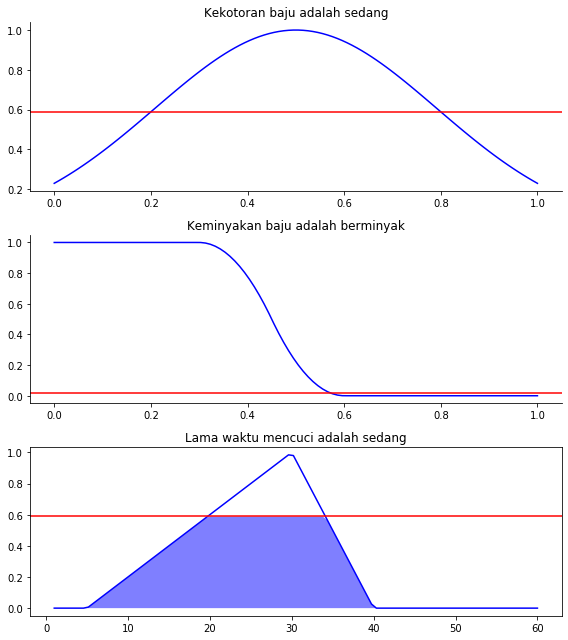

In [274]:
# Jika kekotoran baju adalah sedang atau keminyakan baju adalah berminyak, maka lama mencuci adalah sedang.
fig, (ax0, ax1,ax2) = plt.subplots(nrows=3, figsize=(8, 9))
#1
x_kotor=np.linspace(start = 0, stop = 1, num = 100, dtype = float)
y_kotor=fuzz.membership.gaussmf(x_kotor,np.mean(x_kotor),np.std(x_kotor)) 
ax0.plot(x_kotor, y_kotor, 'b', linewidth=1.5)
ax0.axhline(y=kotor_level_md,linewidth=1.5,c='r')
ax0.set_title('Kekotoran baju adalah sedang')
#2
x_minyak=np.linspace(start = 0, stop = 1, num = 100, dtype = float)
y_minyak=fuzz.membership.zmf(x,0.3,0.6)
ax1.plot(x_minyak,y_minyak, 'b', linewidth=1.5)
ax1.axhline(y=minyak_level_hi,linewidth=1.5,c='r')
ax1.set_title('Keminyakan baju adalah berminyak')
## Lama mencuci
x_waktu=np.linspace(start = 1, stop = 60, num = 100, dtype = float)
y1_waktu=fuzz.membership.trimf(x_waktu,[5,30,40])
aturan2=np.fmin(active_rule2, y1_waktu)
ax2.fill_between(x_waktu,waktu0 , aturan2, facecolor='b', alpha=0.5)
ax2.plot(x_waktu,y1_waktu, 'b', linewidth=1.5)
ax2.axhline(y=active_rule2,linewidth=1.5,c='r')
ax2.set_title('Lama waktu mencuci adalah sedang')
# Turn off top/right axes
for ax in (ax0, ax1):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

## Rule 3

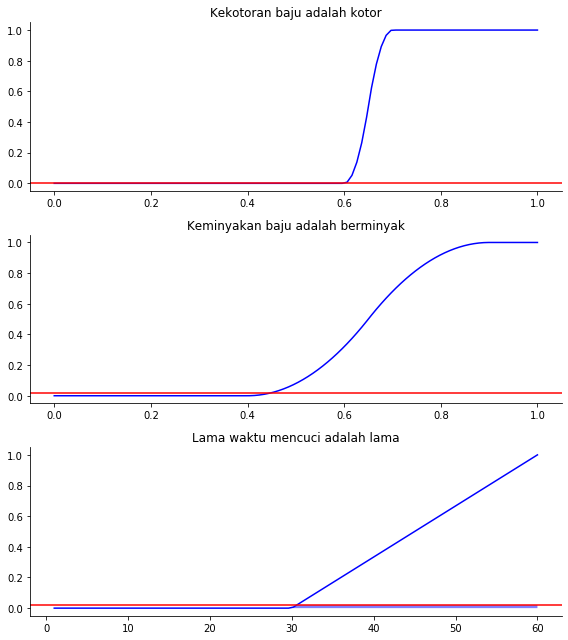

In [275]:
# Jika kekotoran baju adalah kotor atau keminyakan baju adalah berminyak, maka lama mencuci adalah lama.
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))
#1
x_kotor=np.linspace(start = 0, stop = 1, num = 100, dtype = float)
y2_kotor=fuzz.membership.smf(x_kotor,0.6,0.7)
ax0.plot(x_kotor, y2_kotor, 'b', linewidth=1.5)
ax0.axhline(y= kotor_level_hi,linewidth=1.5,c='r')
ax0.set_title('Kekotoran baju adalah kotor')
#2
x_minyak=np.linspace(start = 0, stop = 1, num = 100, dtype = float)
y1_minyak=fuzz.membership.smf(x_minyak,0.4,0.9)
ax1.plot(x_minyak,y1_minyak, 'b', linewidth=1.5)
ax1.axhline(y=minyak_level_hi,linewidth=1.5,c='r')
ax1.set_title('Keminyakan baju adalah berminyak')
#3
## Lama mencuci
x_waktu=np.linspace(start = 1, stop = 60, num = 100, dtype = float)
y2_waktu=fuzz.membership.trimf(x_waktu,[30,60,60])
aturan3=np.fmin(active_rule3, y2_waktu)
ax2.fill_between(x_waktu,waktu0 , aturan3, facecolor='b', alpha=0.5)
ax2.plot(x_waktu,y2_waktu, 'b', linewidth=1.5)
ax2.axhline(y=active_rule3,linewidth=1.5,c='r')
ax2.set_title('Lama waktu mencuci adalah lama')
# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

## Aplikasi

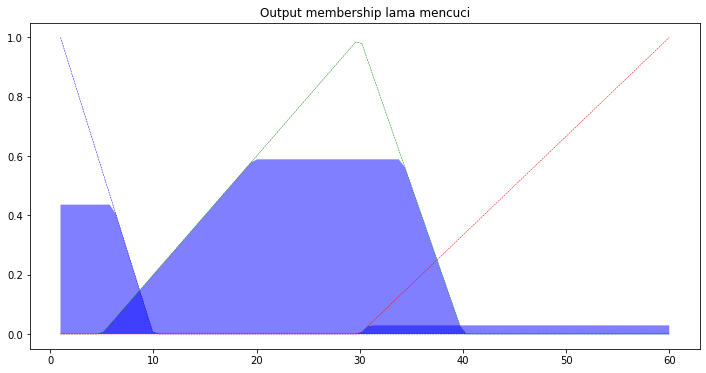

In [253]:
# Aplikasi Rule
x_waktu
y_waktu=fuzz.membership.trimf(x_waktu,[1,1,10])
y1_waktu=fuzz.membership.trimf(x_waktu,[5,30,40])
y2_waktu=fuzz.membership.trimf(x_waktu,[30,60,60])
waktu0 = np.zeros_like(x_waktu)
## aktivasi
waktu_lo=np.fmin(active_rule1, y_waktu)
waktu_med=np.fmin(active_rule2, y1_waktu)
waktu_hi=np.fmin(active_rule3, y2_waktu)
######
fig, ax0 = plt.subplots(figsize=(12, 6))
ax0.fill_between(x_waktu, waktu0, waktu_lo, facecolor='b', alpha=0.5)
ax0.plot(x_waktu, y_waktu, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_waktu, waktu0, waktu_med, facecolor='b', alpha=0.5)
ax0.plot(x_waktu, y1_waktu, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_waktu, waktu0, waktu_hi, facecolor='b', alpha=0.5)
ax0.plot(x_waktu, y2_waktu, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership lama mencuci')
plt.show()

## Defuzzifikasi

Jadi lama waktu mencuci yang diperlukan adalah selama 22.0 menit


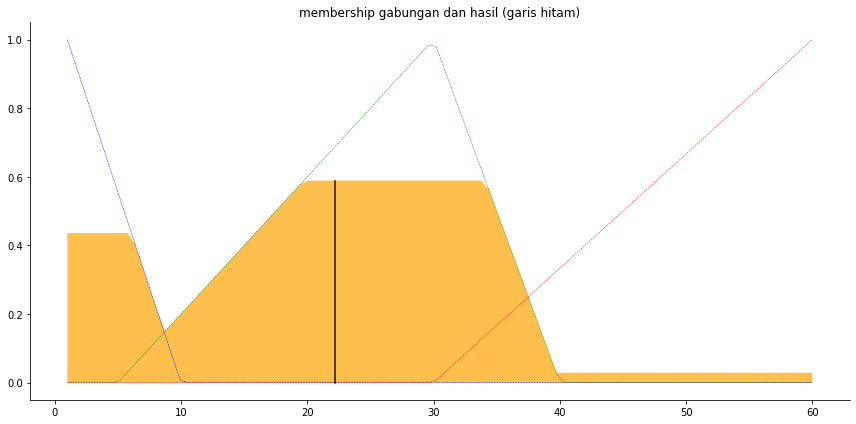

In [254]:
# menggabungkan ketiga output membership
aggregated = np.fmax(waktu_lo,
                     np.fmax(waktu_med, waktu_hi))

# menghitung menggunakan centroid
lama= fuzz.defuzz(x_waktu, aggregated, 'centroid')
lama_mencuci = fuzz.interp_membership(x_waktu, aggregated, lama)  


fig, ax0 = plt.subplots(figsize=(12, 6))

ax0.plot(x_waktu, y_waktu, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_waktu, y1_waktu, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_waktu, y2_waktu, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_waktu, waktu0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([lama, lama], [0, lama_mencuci], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('membership gabungan dan hasil (garis hitam)')


for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
print(f'Jadi lama waktu mencuci yang diperlukan adalah selama {round(lama)} menit')